In [1]:
import spotipy.util as util
import spotipy
from numpy import array
from sklearn.preprocessing import LabelEncoder
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import plotly
import plotly.express as px
from plotly.offline import plot

sns.set(style = 'white',context= 'notebook', rc = {'figure.figsize':(14,10)})

In [2]:
plotly.offline.init_notebook_mode(connected=True)

In [3]:
import ast
from typing import List
from os import listdir
def get_streamings(path: str = 'Spotify Data') -> List[dict]:
    
    files = ['Spotify Data/' + x for x in listdir(path)
             if x.split('.')[0][:-1] == 'StreamingHistory']
    
    all_streamings = []
    
    for file in files: 
        with open(file, 'r', encoding='UTF-8') as f:
            new_streamings = ast.literal_eval(f.read())
            all_streamings += [streaming for streaming 
                               in new_streamings]
    return all_streamings

In [4]:
username = '9cjfei8bx9vq78vel4odrjd3y'
client_id ='f2018fb393c2424dba2844c31e8e2c18'
client_secret = 'f4bb9567dafc4625877be647542fd919'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played user-top-read playlist-read-private user-library-read user-follow-read'

token = util.prompt_for_user_token(username=username, 
scope=scope, 
client_id=client_id,   
client_secret=client_secret,     
redirect_uri=redirect_uri)

In [5]:
import requests
def get_id(track_name: str, token: str) -> str:
    headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
    params = [
    ('q', track_name),
    ('type', 'track'),
    ]
    try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
    except:
        return None

In [6]:
def get_features(track_id: str, token: str) -> dict:
    sp = spotipy.Spotify(auth=token)
    try:
        features = sp.audio_features([track_id])
        return features[0]
    except:
        return None

In [4]:
df = pd.read_pickle('Created_Features\Songs_I_Like.pkl')
df

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature
0,Sucker,Sucker,Jonas Brothers,4y3OI86AEP6PQoDE6olYhO,2019-03-01,9,181040,0.842,0.04270,0.734,0.000000,0.106,0.952,-5.065,0.0588,137.958,1,4
1,Sunday Morning,Songs About Jane,Maroon 5,4T5cqerbDXueYSVfXkIITo,2002-06-25,0,244866,0.604,0.07560,0.761,0.000000,0.062,0.787,-5.227,0.0468,88.040,0,4
2,Rain,Freedom Child,The Script,2QWP8NYYplOqEFBYGCcq0S,2017-09-01,62,209346,0.689,0.24100,0.586,0.000000,0.356,0.611,-7.610,0.1070,93.020,6,4
3,November Rain,Use Your Illusion I,Guns N' Roses,53968oKecrFxkErocab2Al,1991-09-17,0,537506,0.197,0.01650,0.629,0.279000,0.125,0.221,-9.291,0.0300,79.495,11,4
4,Best 4 U,Red Pill Blues (Deluxe),Maroon 5,3I1JTx525DKElzlTYOBfZN,2018-06-15,53,239751,0.526,0.12700,0.608,0.000000,0.113,0.372,-5.776,0.1690,93.311,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,Not That Kind of Girl - Live Demo,The Black Parade / Living with Ghosts (The 10t...,My Chemical Romance,4ZPgbqIPdSGvDTzRBjpL3R,2016-09-23,38,182960,0.389,0.00191,0.754,0.000206,0.154,0.579,-5.978,0.0783,161.034,1,4
312,Emily - Rough Mix,The Black Parade / Living with Ghosts (The 10t...,My Chemical Romance,3MFiumsps05X2QUgMeBmUw,2016-09-23,39,191693,0.507,0.00499,0.772,0.000000,0.301,0.637,-4.395,0.0387,171.763,7,4
313,All the Angels - Live Demo,The Black Parade / Living with Ghosts (The 10t...,My Chemical Romance,0nF9vweVf1fe2L2piR1P0F,2016-09-23,51,193666,0.554,0.70500,0.382,0.000092,0.124,0.277,-11.824,0.0434,74.363,11,4
314,Disenchanted - Live Demo,The Black Parade / Living with Ghosts (The 10t...,My Chemical Romance,0a03N0ce72aIJY4eHK8p2b,2016-09-23,32,241986,0.532,0.04400,0.776,0.000001,0.398,0.468,-6.702,0.0444,99.803,9,4


In [8]:
df = df.sort_values(by=['msPlayed'],ascending = False)
df = df.drop_duplicates("trackName", keep = 'first')
df = df.reset_index(drop = True)
df

,endTime,artistName,trackName,msPlayed
0,2019-12-02 14:54,Kumar Gandharva,Runanubandhachya,737531
1,2019-12-31 21:47,Miles Davis,All Blues,692745
2,2020-05-04 05:45,The Weeknd,In Your Eyes,621062
3,2019-10-01 04:17,Lynyrd Skynyrd,Free Bird,614118
4,2019-12-31 22:05,Miles Davis,So What,562620
...,...,...,...,...
927,2019-11-09 18:19,Franz Schubert,"Schwanengesang, D. 957: 4. Ständchen In D Mino...",61606
928,2020-03-02 13:40,Sleepermane,Frosty,61533
929,2020-03-11 15:22,Rajstar,Shh,60778
930,2019-09-29 17:57,Lata Mangeshkar,"Tum Aa Gaye Ho Noor Aa Gaya (From ""Aandhi"")",60595


In [9]:
df1= df['endTime'].str.split("-",n=1,expand = True)
df['endTime'] = df1[0]
df = df[df['endTime']=='2020']


In [10]:
df = df.reset_index(drop = True)

In [11]:
unique_tracks = list(set(df['trackName']))
len(unique_tracks)

403

In [12]:
#Get All features for the top tracks
all_features = {}
for track in unique_tracks:
    track_id = get_id(track, token)
    features = get_features(track_id, token)
    if features:
        all_features[track] = features

In [13]:
all1 = pd.DataFrame(all_features)
all2 = all1.transpose()
all2 = all2.reset_index()
all2 = all2.rename(columns={'index':'trackName'})
all2

,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Umbrella,0.583,0.829,1,-4.603,1,0.134,0.00864,0,0.0426,0.575,174.028,audio_features,49FYlytm3dAAraYgpoJZux,spotify:track:49FYlytm3dAAraYgpoJZux,https://api.spotify.com/v1/tracks/49FYlytm3dAA...,https://api.spotify.com/v1/audio-analysis/49FY...,275987,4
1,Thnks fr th Mmrs,0.459,0.891,10,-5.057,0,0.0623,0.00511,0,0.106,0.588,154.837,audio_features,3Zwu2K0Qa5sT6teCCHPShP,spotify:track:3Zwu2K0Qa5sT6teCCHPShP,https://api.spotify.com/v1/tracks/3Zwu2K0Qa5sT...,https://api.spotify.com/v1/audio-analysis/3Zwu...,203507,4
2,Victorious,0.57,0.865,8,-4.518,1,0.0472,0.00205,0,0.404,0.691,110.01,audio_features,6od5hFv9IT5JHc7NEF9HRv,spotify:track:6od5hFv9IT5JHc7NEF9HRv,https://api.spotify.com/v1/tracks/6od5hFv9IT5J...,https://api.spotify.com/v1/audio-analysis/6od5...,178600,4
3,Minority,0.551,0.965,0,-2.772,1,0.0452,0.00576,0,0.171,0.708,137.841,audio_features,4qjfQnccStTR8zNsb6Mizo,spotify:track:4qjfQnccStTR8zNsb6Mizo,https://api.spotify.com/v1/tracks/4qjfQnccStTR...,https://api.spotify.com/v1/audio-analysis/4qjf...,168227,4
4,Until I Bleed Out,0.245,0.394,0,-9.887,0,0.0374,0.423,2.9e-05,0.093,0.148,115.233,audio_features,2BcnxwxBuar5wjCaLqm5N3,spotify:track:2BcnxwxBuar5wjCaLqm5N3,https://api.spotify.com/v1/tracks/2BcnxwxBuar5...,https://api.spotify.com/v1/audio-analysis/2Bcn...,190173,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Black And White,0.443,0.582,2,-6.02,1,0.0482,0.0301,0,0.127,0.239,147.589,audio_features,7rpNuuoMbid56XkDsx2FjE,spotify:track:7rpNuuoMbid56XkDsx2FjE,https://api.spotify.com/v1/tracks/7rpNuuoMbid5...,https://api.spotify.com/v1/audio-analysis/7rpN...,193090,4
394,You're All I Want,0.439,0.469,5,-10.949,1,0.0244,0.365,0.812,0.113,0.276,90.985,audio_features,4nvLuqwTOZdEJI1fcHXv8h,spotify:track:4nvLuqwTOZdEJI1fcHXv8h,https://api.spotify.com/v1/tracks/4nvLuqwTOZdE...,https://api.spotify.com/v1/audio-analysis/4nvL...,264453,4
395,Gold on the Ceiling,0.505,0.833,0,-4.632,1,0.0475,0.00772,7.9e-05,0.069,0.565,130.121,audio_features,5lN1EH25gdiqT1SFALMAq1,spotify:track:5lN1EH25gdiqT1SFALMAq1,https://api.spotify.com/v1/tracks/5lN1EH25gdiq...,https://api.spotify.com/v1/audio-analysis/5lN1...,224333,4
396,Lying Is the Most Fun a Girl Can Have Without ...,0.66,0.799,8,-4.644,1,0.0995,0.106,0,0.154,0.475,125.966,audio_features,7wOmQJeVX6qjNXqqsKOkPx,spotify:track:7wOmQJeVX6qjNXqqsKOkPx,https://api.spotify.com/v1/tracks/7wOmQJeVX6qj...,https://api.spotify.com/v1/audio-analysis/7wOm...,200227,4


In [14]:
merged = pd.merge(all2,df,how ='inner',left_on = 'trackName', right_on ='trackName')
merged

,trackName,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,endTime,artistName,msPlayed
0,Umbrella,0.583,0.829,1,-4.603,1,0.134,0.00864,0,0.0426,...,audio_features,49FYlytm3dAAraYgpoJZux,spotify:track:49FYlytm3dAAraYgpoJZux,https://api.spotify.com/v1/tracks/49FYlytm3dAA...,https://api.spotify.com/v1/audio-analysis/49FY...,275987,4,2020,Rihanna,507016
1,Thnks fr th Mmrs,0.459,0.891,10,-5.057,0,0.0623,0.00511,0,0.106,...,audio_features,3Zwu2K0Qa5sT6teCCHPShP,spotify:track:3Zwu2K0Qa5sT6teCCHPShP,https://api.spotify.com/v1/tracks/3Zwu2K0Qa5sT...,https://api.spotify.com/v1/audio-analysis/3Zwu...,203507,4,2020,Fall Out Boy,203506
2,Victorious,0.57,0.865,8,-4.518,1,0.0472,0.00205,0,0.404,...,audio_features,6od5hFv9IT5JHc7NEF9HRv,spotify:track:6od5hFv9IT5JHc7NEF9HRv,https://api.spotify.com/v1/tracks/6od5hFv9IT5J...,https://api.spotify.com/v1/audio-analysis/6od5...,178600,4,2020,Panic! At The Disco,178600
3,Minority,0.551,0.965,0,-2.772,1,0.0452,0.00576,0,0.171,...,audio_features,4qjfQnccStTR8zNsb6Mizo,spotify:track:4qjfQnccStTR8zNsb6Mizo,https://api.spotify.com/v1/tracks/4qjfQnccStTR...,https://api.spotify.com/v1/audio-analysis/4qjf...,168227,4,2020,Green Day,162822
4,Until I Bleed Out,0.245,0.394,0,-9.887,0,0.0374,0.423,2.9e-05,0.093,...,audio_features,2BcnxwxBuar5wjCaLqm5N3,spotify:track:2BcnxwxBuar5wjCaLqm5N3,https://api.spotify.com/v1/tracks/2BcnxwxBuar5...,https://api.spotify.com/v1/audio-analysis/2Bcn...,190173,3,2020,The Weeknd,179357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Black And White,0.443,0.582,2,-6.02,1,0.0482,0.0301,0,0.127,...,audio_features,7rpNuuoMbid56XkDsx2FjE,spotify:track:7rpNuuoMbid56XkDsx2FjE,https://api.spotify.com/v1/tracks/7rpNuuoMbid5...,https://api.spotify.com/v1/audio-analysis/7rpN...,193090,4,2020,Niall Horan,193089
394,You're All I Want,0.439,0.469,5,-10.949,1,0.0244,0.365,0.812,0.113,...,audio_features,4nvLuqwTOZdEJI1fcHXv8h,spotify:track:4nvLuqwTOZdEJI1fcHXv8h,https://api.spotify.com/v1/tracks/4nvLuqwTOZdE...,https://api.spotify.com/v1/audio-analysis/4nvL...,264453,4,2020,Cigarettes After Sex,154586
395,Gold on the Ceiling,0.505,0.833,0,-4.632,1,0.0475,0.00772,7.9e-05,0.069,...,audio_features,5lN1EH25gdiqT1SFALMAq1,spotify:track:5lN1EH25gdiqT1SFALMAq1,https://api.spotify.com/v1/tracks/5lN1EH25gdiq...,https://api.spotify.com/v1/audio-analysis/5lN1...,224333,4,2020,The Black Keys,102881
396,Lying Is the Most Fun a Girl Can Have Without ...,0.66,0.799,8,-4.644,1,0.0995,0.106,0,0.154,...,audio_features,7wOmQJeVX6qjNXqqsKOkPx,spotify:track:7wOmQJeVX6qjNXqqsKOkPx,https://api.spotify.com/v1/tracks/7wOmQJeVX6qj...,https://api.spotify.com/v1/audio-analysis/7wOm...,200227,4,2020,Panic! At The Disco,88503


In [9]:

le1 = LabelEncoder()
ie1= le1.fit_transform(array(df['artist']))
df['artist_code']= pd.DataFrame(ie1)
df['artist_code'] = df['artist_code'].astype('int')
len(df['artist_code'].unique())

108

In [19]:
display(df.iloc[3,:])


name                         November Rain
album                  Use Your Illusion I
artist                       Guns N' Roses
id                  53968oKecrFxkErocab2Al
release_date                    1991-09-17
popularity                               0
length                              537506
danceability                         0.197
acousticness                        0.0165
energy                               0.629
instrumentalness                     0.279
liveness                             0.125
valence                              0.221
loudness                            -9.291
speechiness                           0.03
tempo                               79.495
key                                     11
time_signature                           4
artist_code                             43
X                                        0
Y                                        0
Name: 3, dtype: object

In [29]:

reducer = umap.UMAP(n_neighbors = 20, min_dist = 0.5)

prescale = df.iloc[:,5:16].values #select only dimensional data
scaled= StandardScaler().fit_transform(prescale)
scaled.shape

(316, 11)

In [30]:
embedding = reducer.fit_transform(scaled)

In [31]:
embed_df = pd.DataFrame(embedding)
df['X']=embed_df.iloc[:,0]
df['Y']=embed_df.iloc[:,1]

In [33]:
fig = px.scatter(df, x= 'X', y = "Y", color = 'album', hover_data=['name','artist','album'])
plot(fig)

'temp-plot.html'

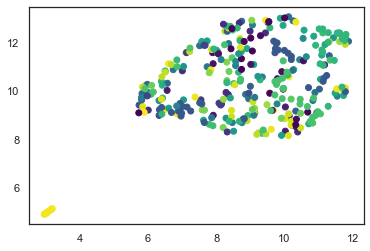

In [17]:
plt.scatter(
    embed_df.iloc[:, 0],
    embed_df.iloc[:, 1],
    c=df['artist_code'],
    cmap='viridis')
plt.show()

In [34]:
sphere_mapper = umap.UMAP(output_metric='haversine', random_state=42).fit(scaled)

In [35]:
x = np.sin(sphere_mapper.embedding_[:, 0]) * np.cos(sphere_mapper.embedding_[:, 1])
y = np.sin(sphere_mapper.embedding_[:, 0]) * np.sin(sphere_mapper.embedding_[:, 1])
z = np.cos(sphere_mapper.embedding_[:, 0])

In [41]:
sph = merged 
sph['Z']=0
sph.iloc[:,23] = x
sph.iloc[:,24] = y
sph.iloc[:,25] = z

In [44]:
fig = px.scatter_3d(sph, x= 'X', y = "Y",z ='Z', color = 'artistName', hover_data=['trackName','artistName'])
plot(fig)

'temp-plot.html'